# Clustering Bug Reports Using Embeddings

<u><b>Full Procedure</b></u>

1. Prepare the Dataset
- Load and read a CSV file containing bug reports with associated embeddings
- Clean the dataset by filtering out lower-priority issues and converting embedding strings into arrays for computation
- Stack all embeddings into a matrix format to prepare for clustering

2. Clustering and Visualization
- Use KMeans to cluster embeddings into priority groups
- Reduce dimensions with t-SNE for better visualization and plot the results

3. Group and Name Clusters by Subject
- Group bug reports into clusters and ask the OpenAI API what do they have in common
- Display bug reports clustered together along with their common topic

### Imports and Read Data

In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from openai import OpenAI

client = OpenAI()

In [2]:
data_path = "bug_reports_mozilla_firefox_resolved_fixed_comments_embeddings.csv"

data = pd.read_csv(data_path)
data["Embeddings"] = data.Embeddings.apply(literal_eval).apply(np.array)  # Convert string to array

In [3]:
data = data[data["Priority"] != "P3"].reset_index(drop = True)

In [ ]:
data["Priority"] = data.Priority.replace({'P1': 1, 'P2': 2})

In [5]:
matrix = np.vstack(data.Embeddings.values)
matrix.shape

(8533, 1536)

### Clustering

In [6]:
n_clusters = 4

kmeans = KMeans(n_clusters = n_clusters, init = "k-means++", random_state = 12345)
kmeans.fit(matrix)
labels = kmeans.labels_
data["Cluster"] = labels

data.groupby("Cluster").Priority.mean().sort_values()

Cluster
2    1.319412
3    1.327452
1    1.357919
0    1.424693
Name: Priority, dtype: float64

### TSNE

Text(0.5, 1.0, 'Clusters identified visualized in language 2D using t-SNE')

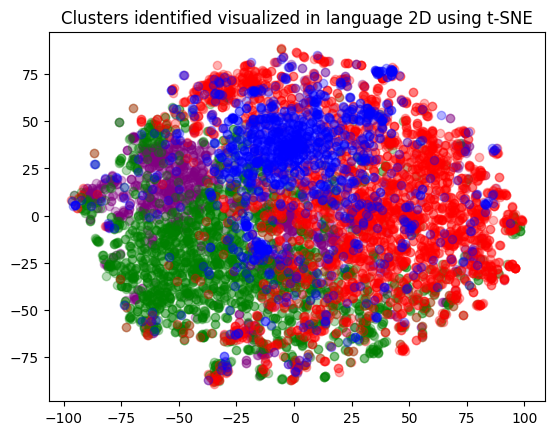

In [7]:
tsne = TSNE(n_components = 2, perplexity = 15, random_state = 12345, init = "random", learning_rate = 200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[data.Cluster == category]
    ys = np.array(y)[data.Cluster == category]
    plt.scatter(xs, ys, color = color, alpha = 0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker = "x", color = color, s = 100)

plt.title("Clusters identified visualized in language 2D using t-SNE")

### Text samples in the clusters & naming the clusters

In [16]:
# Reading reviews that belongs to each group
rev_per_cluster = 5

for i in range(n_clusters):
    print(f"Cluster {i} Theme: ", end = "")

    reviews = "\n".join(
        data[data.Cluster == i]
        .Concat
        .sample(rev_per_cluster, random_state = 12345)
        .values
    )

    messages = [
        {"role": "user", "content": f'What do the following bug reports have in common?\n\nBug Report:\n"""\n{reviews}\n"""\n\nTheme:'}
    ]

    response = client.chat.completions.create(
        model = "gpt-4",
        messages = messages,
        temperature=0,
        max_tokens = 64,
        top_p = 1,
        frequency_penalty = 0,
        presence_penalty = 0)
    
    print(response.choices[0].message.content.replace("\n", ""))

    sample_cluster_rows = data[data.Cluster == i].sample(rev_per_cluster, random_state = 12345)
    
    for j in range(rev_per_cluster):
        print("\n")
        print(sample_cluster_rows.Priority.values[j], end=", ")
        print(sample_cluster_rows.Concat.values[j])

    print("\n")
    print("-" * 100)
    print("\n")

Cluster 0 Theme: All the bug reports are related to issues with the Firefox browser.


1, summary the client id not add search url russia region description firefox ubuntu window mac os open firefox russia localize build have region config set ru have yandex default search engine search word the client id clid add search url the url search doe not contain client id russia please note issue occur on turkey build vpn set turkey region set tr


2, summary bookmark html symbolic link link destroy after running firebird description user agent mozilla gecko phoenix build identify mozilla gecko phoenix bookmark html symbolic link convert real file after running firebird this happen phoenix reproduce always steps reproduce create symbolic link bookmark html run firebird actual result bookmark html not lost content real file expect result leave bookmark html symbolic link alter destination file


2, summary onitem notification dispatch closed container reload live bookmark bookmark organize win